<a href="https://colab.research.google.com/github/BhuBi347/Stat-229352/blob/main/Lab06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [37]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

In [38]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

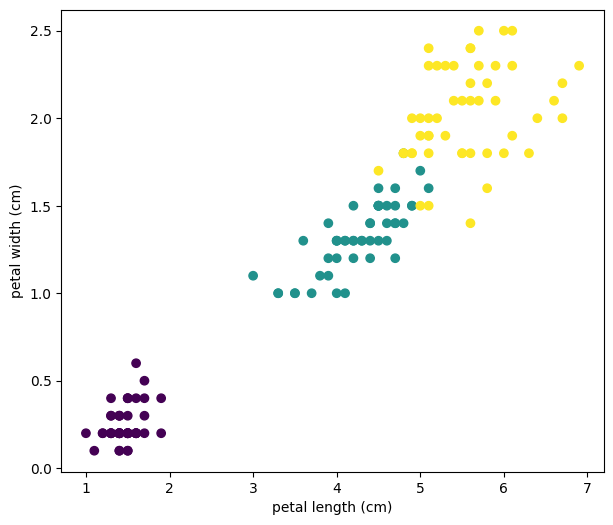

In [39]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [40]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y, title=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(7,6))

    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.25)  # Background
    ax.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    ax.scatter(X[:,0], X[:,1], c=y);  # Data points
    ax.set_xlabel(iris.feature_names[2])
    ax.set_ylabel(iris.feature_names[3])
    if title:
        ax.set_title(title)

#### Exercise 1. Split the data into training set and test set.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

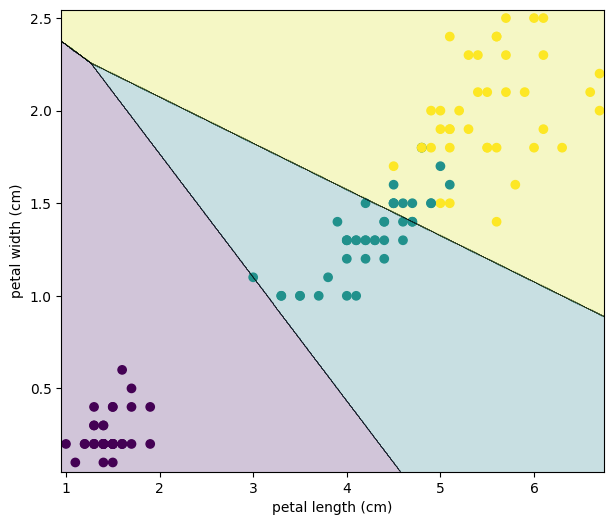

In [42]:
svc = LinearSVC(C=10,loss='hinge', max_iter=100000)
svc.fit(X_train, y_train)
plot_decision_boundary(svc, X_train, y_train)

เลือก C=10 เพราะว่าการแบ่งกลุ่มค่อนข้างจะถูกต้องเป็นส่วนใหญ่ และได้ลองเช็คจากข้อ 3 มีค่าเออเร่อที่รับได้ และนอกจากนี้เหตุผลที่ไม่เลือก 100 เพราะกลัวว่าข้อมูลจะ overfitting

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [43]:
from sklearn.metrics import accuracy_score

chosen_C = 10

linear_svm_chosen = LinearSVC(loss='hinge', C=chosen_C, max_iter=100000, random_state=42)
linear_svm_chosen.fit(X_train, y_train)

y_pred = linear_svm_chosen.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - test_accuracy

print(f"Test error with C = {chosen_C}: {test_error}")

Test error with C = 10: 0.1333333333333333


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

In [44]:
svc2 = SVC(kernel='rbf', C=1.0, gamma=0.01, max_iter=100000)
svc2.fit(X_train, y_train)


SVC(gamma=0.01, max_iter=100000)

ยิ่งค่าแกมมาสูงเท่าไหร่ พารามิเตอร์นี้จะพยายามให้พอดีกับชุดข้อมูลฝึกอบรม

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [45]:
chosen_gamma = 0.01
C = 1.0

kernel_svm_chosen = SVC(kernel='rbf', C=C, gamma=chosen_gamma, max_iter=100000, random_state=42)
kernel_svm_chosen.fit(X_train, y_train)

y_pred_kernel = kernel_svm_chosen.predict(X_test)
test_accuracy_kernel = accuracy_score(y_test, y_pred_kernel)
test_error_kernel = 1 - test_accuracy_kernel

print(f"Test error with gamma = {chosen_gamma}: {test_error_kernel}")
print(f"Number of support vectors: {kernel_svm_chosen.support_vectors_.shape[0]}")

Test error with gamma = 0.01: 0.0
Number of support vectors: 92


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

1. Explain using test accuracy


เลือกใช้ kernel SVM ซึ่งสามารถเห็นชัดได้จากค่า test error ซึ่งในส่วนของ kernek SVM มีค่าผิดพลาดเท่ากับ 0

2. Explaing using decision boundary plot

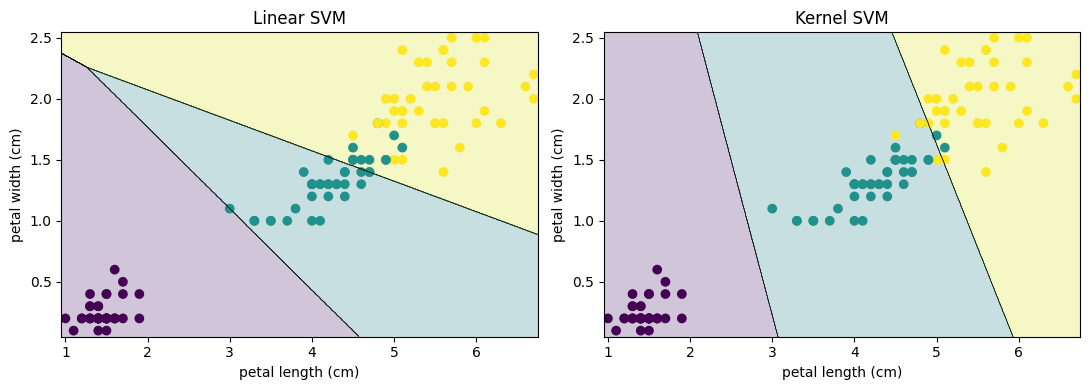

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))


plot_decision_boundary(LinearSVC(C=10,loss='hinge', max_iter=100000).fit(X_train, y_train), X_train, y_train, "Linear SVM", ax1)
plot_decision_boundary(SVC(kernel='rbf', C=C, gamma=chosen_gamma, max_iter=100000, random_state=42).fit(X_train, y_train), X_train, y_train, "Kernel SVM", ax2)

plt.tight_layout()
plt.show()